# Zillow Clustering Explore 

In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

from pydataset import data

import wrangle as w



import warnings
warnings.filterwarnings("ignore")

In [53]:
# set and use zillow color palette
zpalette = ['#1277e1', '#f3ad35', '#0b449c', '#5289e4', '#c3eafb']
sns.set_palette(zpalette)
sns.color_palette()

[(0.07058823529411765, 0.4666666666666667, 0.8823529411764706),
 (0.9529411764705882, 0.6784313725490196, 0.20784313725490197),
 (0.043137254901960784, 0.26666666666666666, 0.611764705882353),
 (0.3215686274509804, 0.5372549019607843, 0.8941176470588236),
 (0.7647058823529411, 0.9176470588235294, 0.984313725490196)]

In [41]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Exercises
Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [54]:
train, validate, test = w.wrangle_zillow()

train --> (37574, 25)
validate --> (16104, 25)
test --> (13420, 25)


In [ ]:
# in the scope of exploration:
# - frame questions with our tools:
# - univariate exploration
# - bivariate exploration
# - multivariate exploration


# 1. univariate explorate
# - What are the distributions of each variables? 

# 2. Bivariate:
# - Does logerror score vary across county

# 3. Bivariate:
# - Is there a relationship between logerror and bedroom count?

# 4. Is there a relationship between logerror and bathroom count?

# multivariate:
# 5. If we control for calculatedfinishedsqft, does logerror differ across tax amount

# 6. If we control for fullbathcnt, does logerror differ across yearbuilt?

## 1. Distribution of all Variables 
- Univariate Exploration

In [4]:
def plot_variable_dist(df, figsize = (3,2)):
    '''
    This function is for exploring. Takes in a dataframe with variables you would like to see the distribution of.
    Input the dataframe (either fully, or using .drop) with ONLY the columns you want to see plotted.
    Optional argument figsize. Default it's small. 
    BTW if you just put list(df) it pulls out only the column names
    '''
    # loop through columns and use seaborn to plot distributions
    for col in list(df):
        plt.figure(figsize=figsize)
        plt.hist(data = df, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

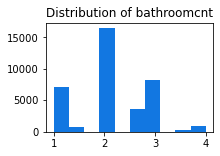

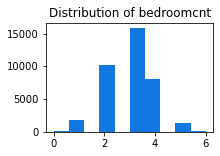

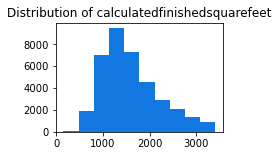

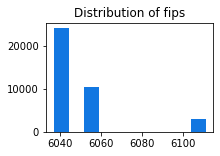

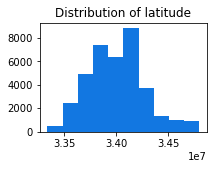

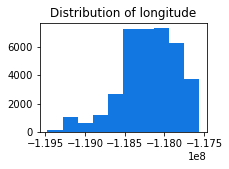

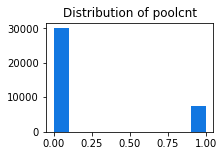

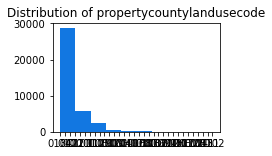

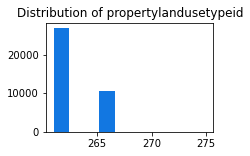

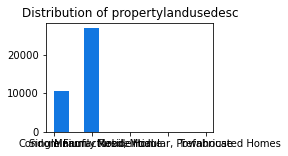

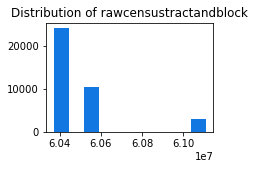

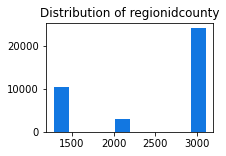

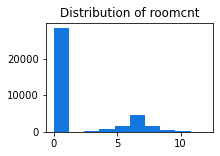

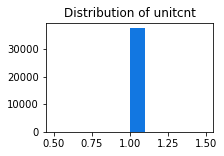

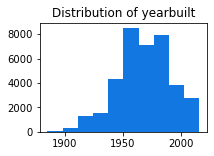

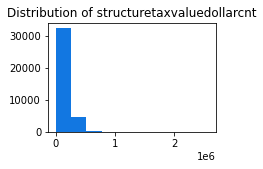

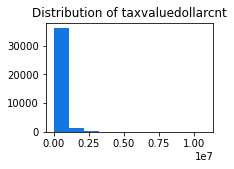

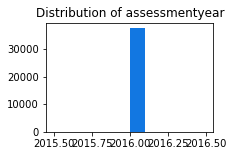

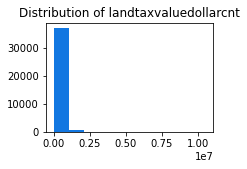

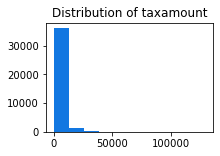

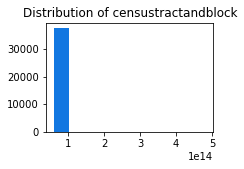

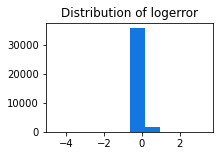

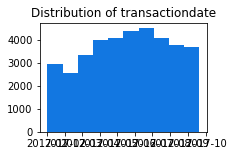

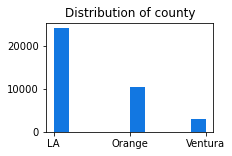

In [5]:
plot_variable_dist(train.drop(columns = 'parcelid'))

In [6]:
def explore_univariate(df, figsize = (18,3)):
    '''
    This function is for exploring. Takes in a dataframe with variables you would like to see the box plot of.
    Input the dataframe (either fully, or using .drop) with ONLY the columns you want to see plotted.
    Optional arguement figsize. Default it's small.    
    '''

    for col in list(df):
        plt.figure(figsize=figsize)
        plt.subplot(121)
        plt.boxplot(x = col, data = df)
        plt.title(f'Box Plot of {col}')

        plt.subplot(122)
        plt.hist(data = df, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

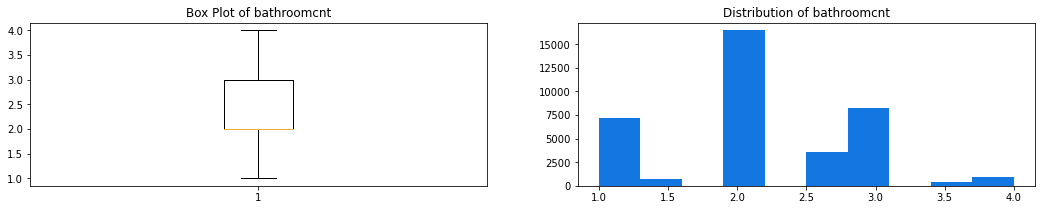

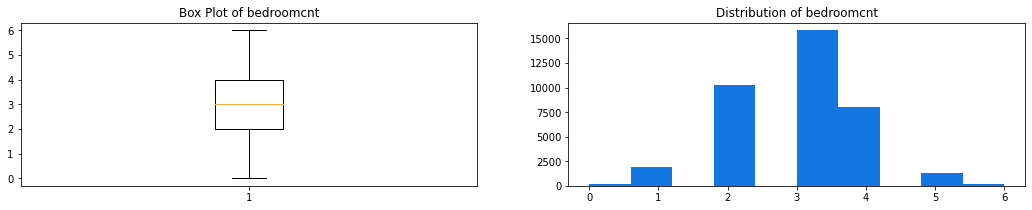

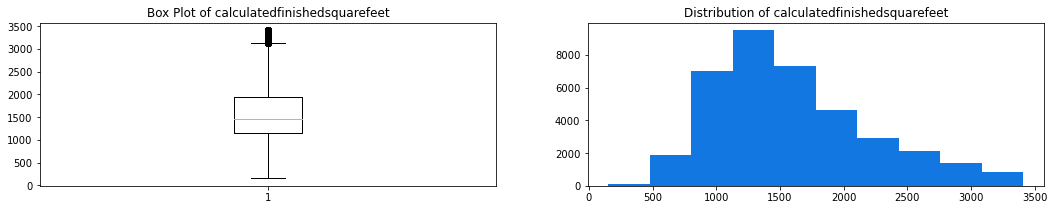

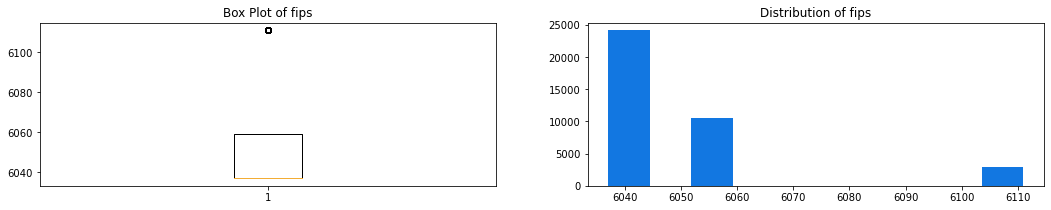

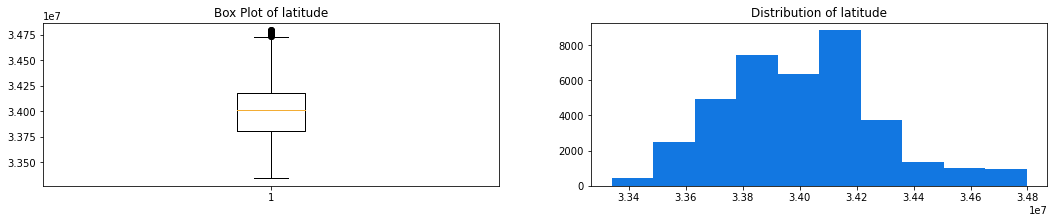

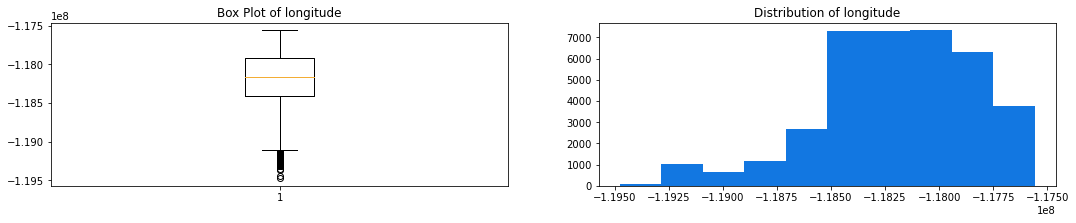

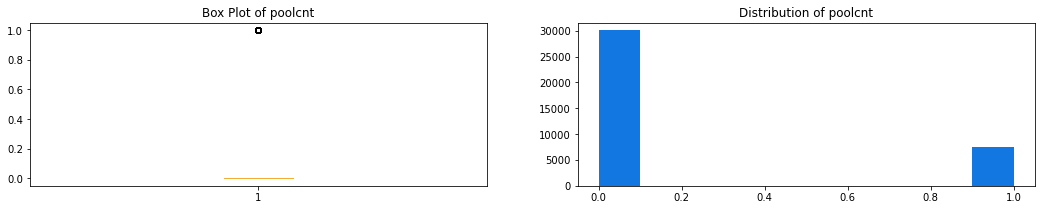

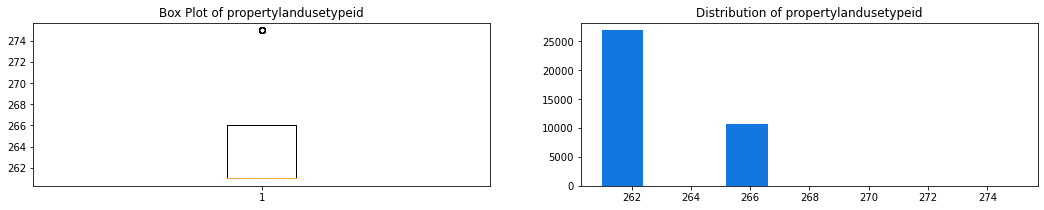

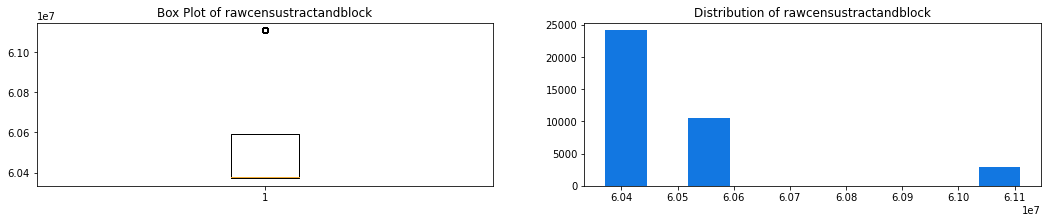

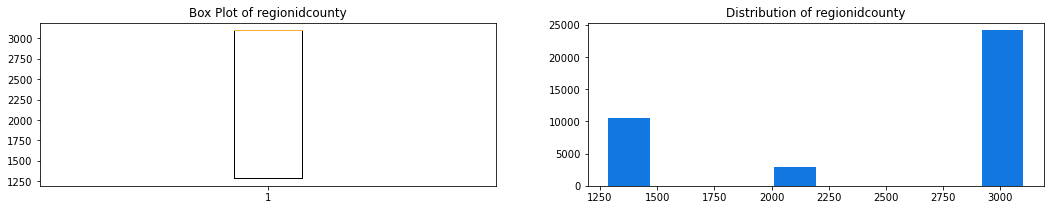

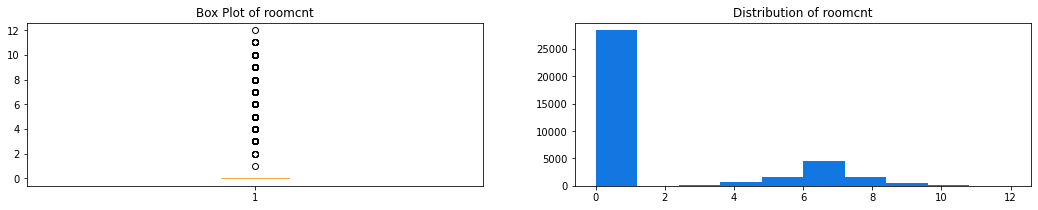

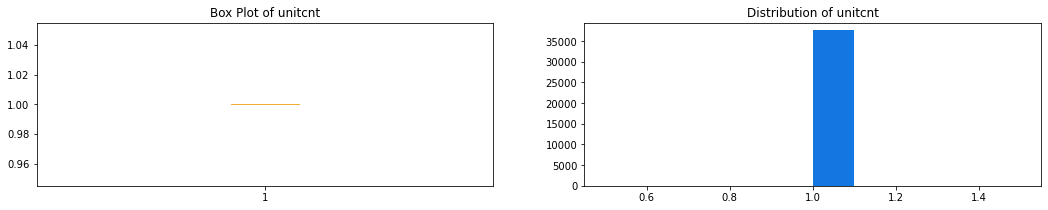

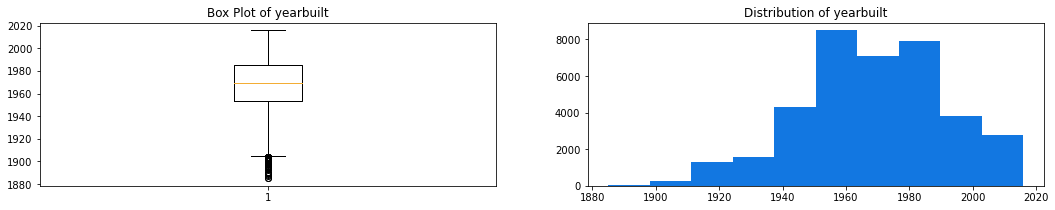

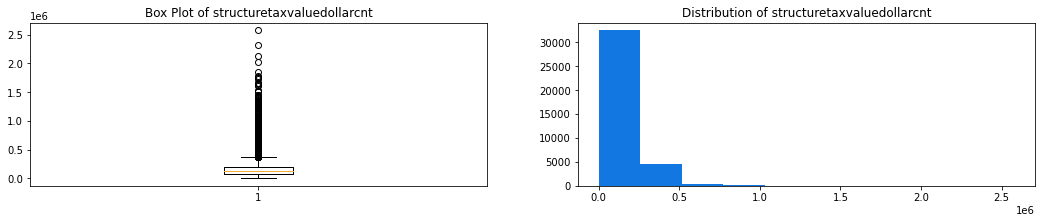

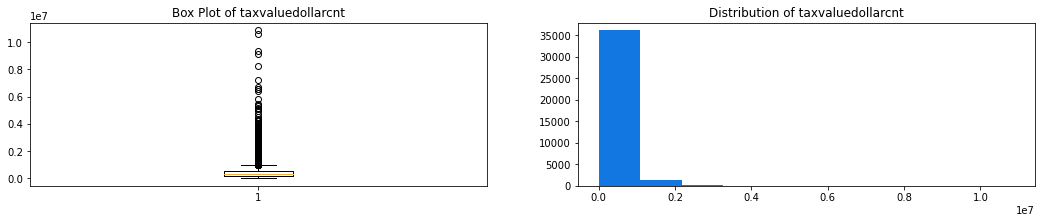

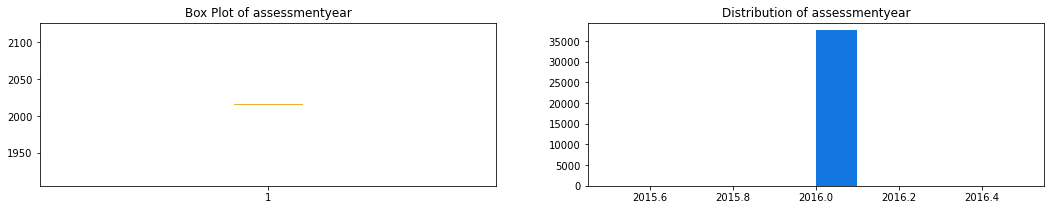

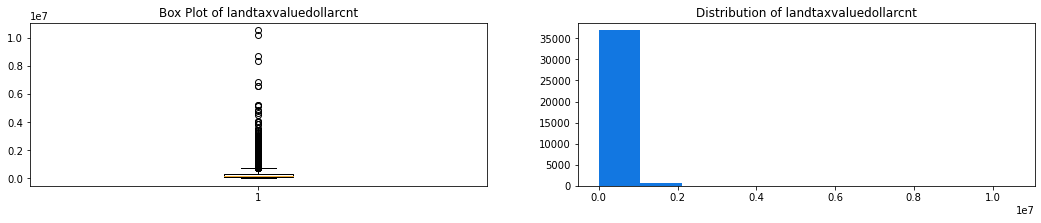

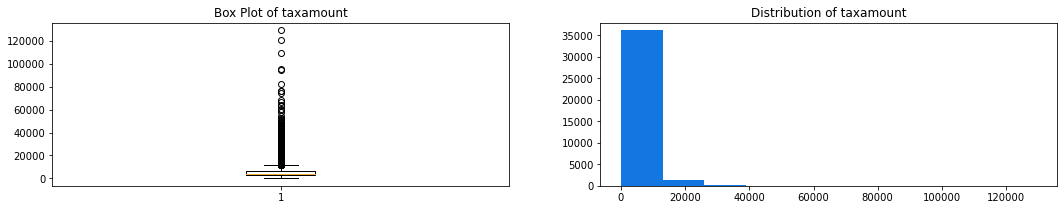

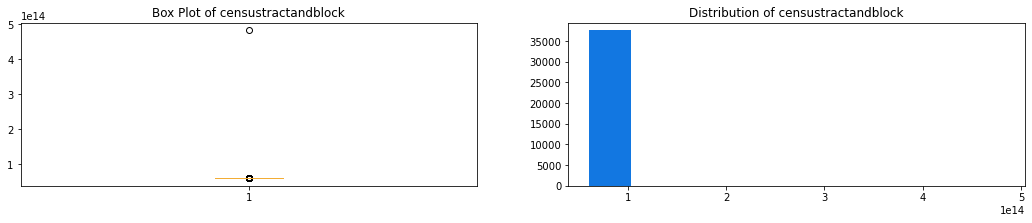

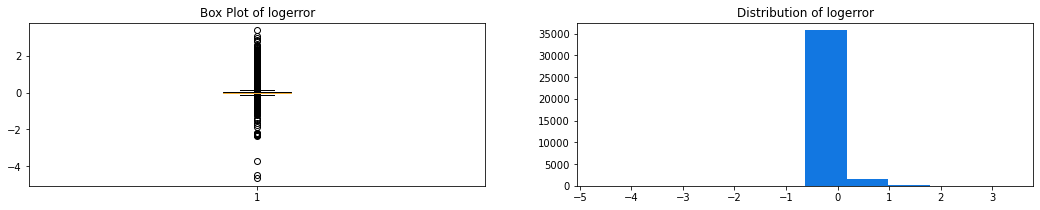

In [7]:
cols_to_drop = ['parcelid', 'propertycountylandusecode', 'propertylandusedesc', 'transactiondate', 'county']
explore_univariate(train.drop(columns = cols_to_drop))

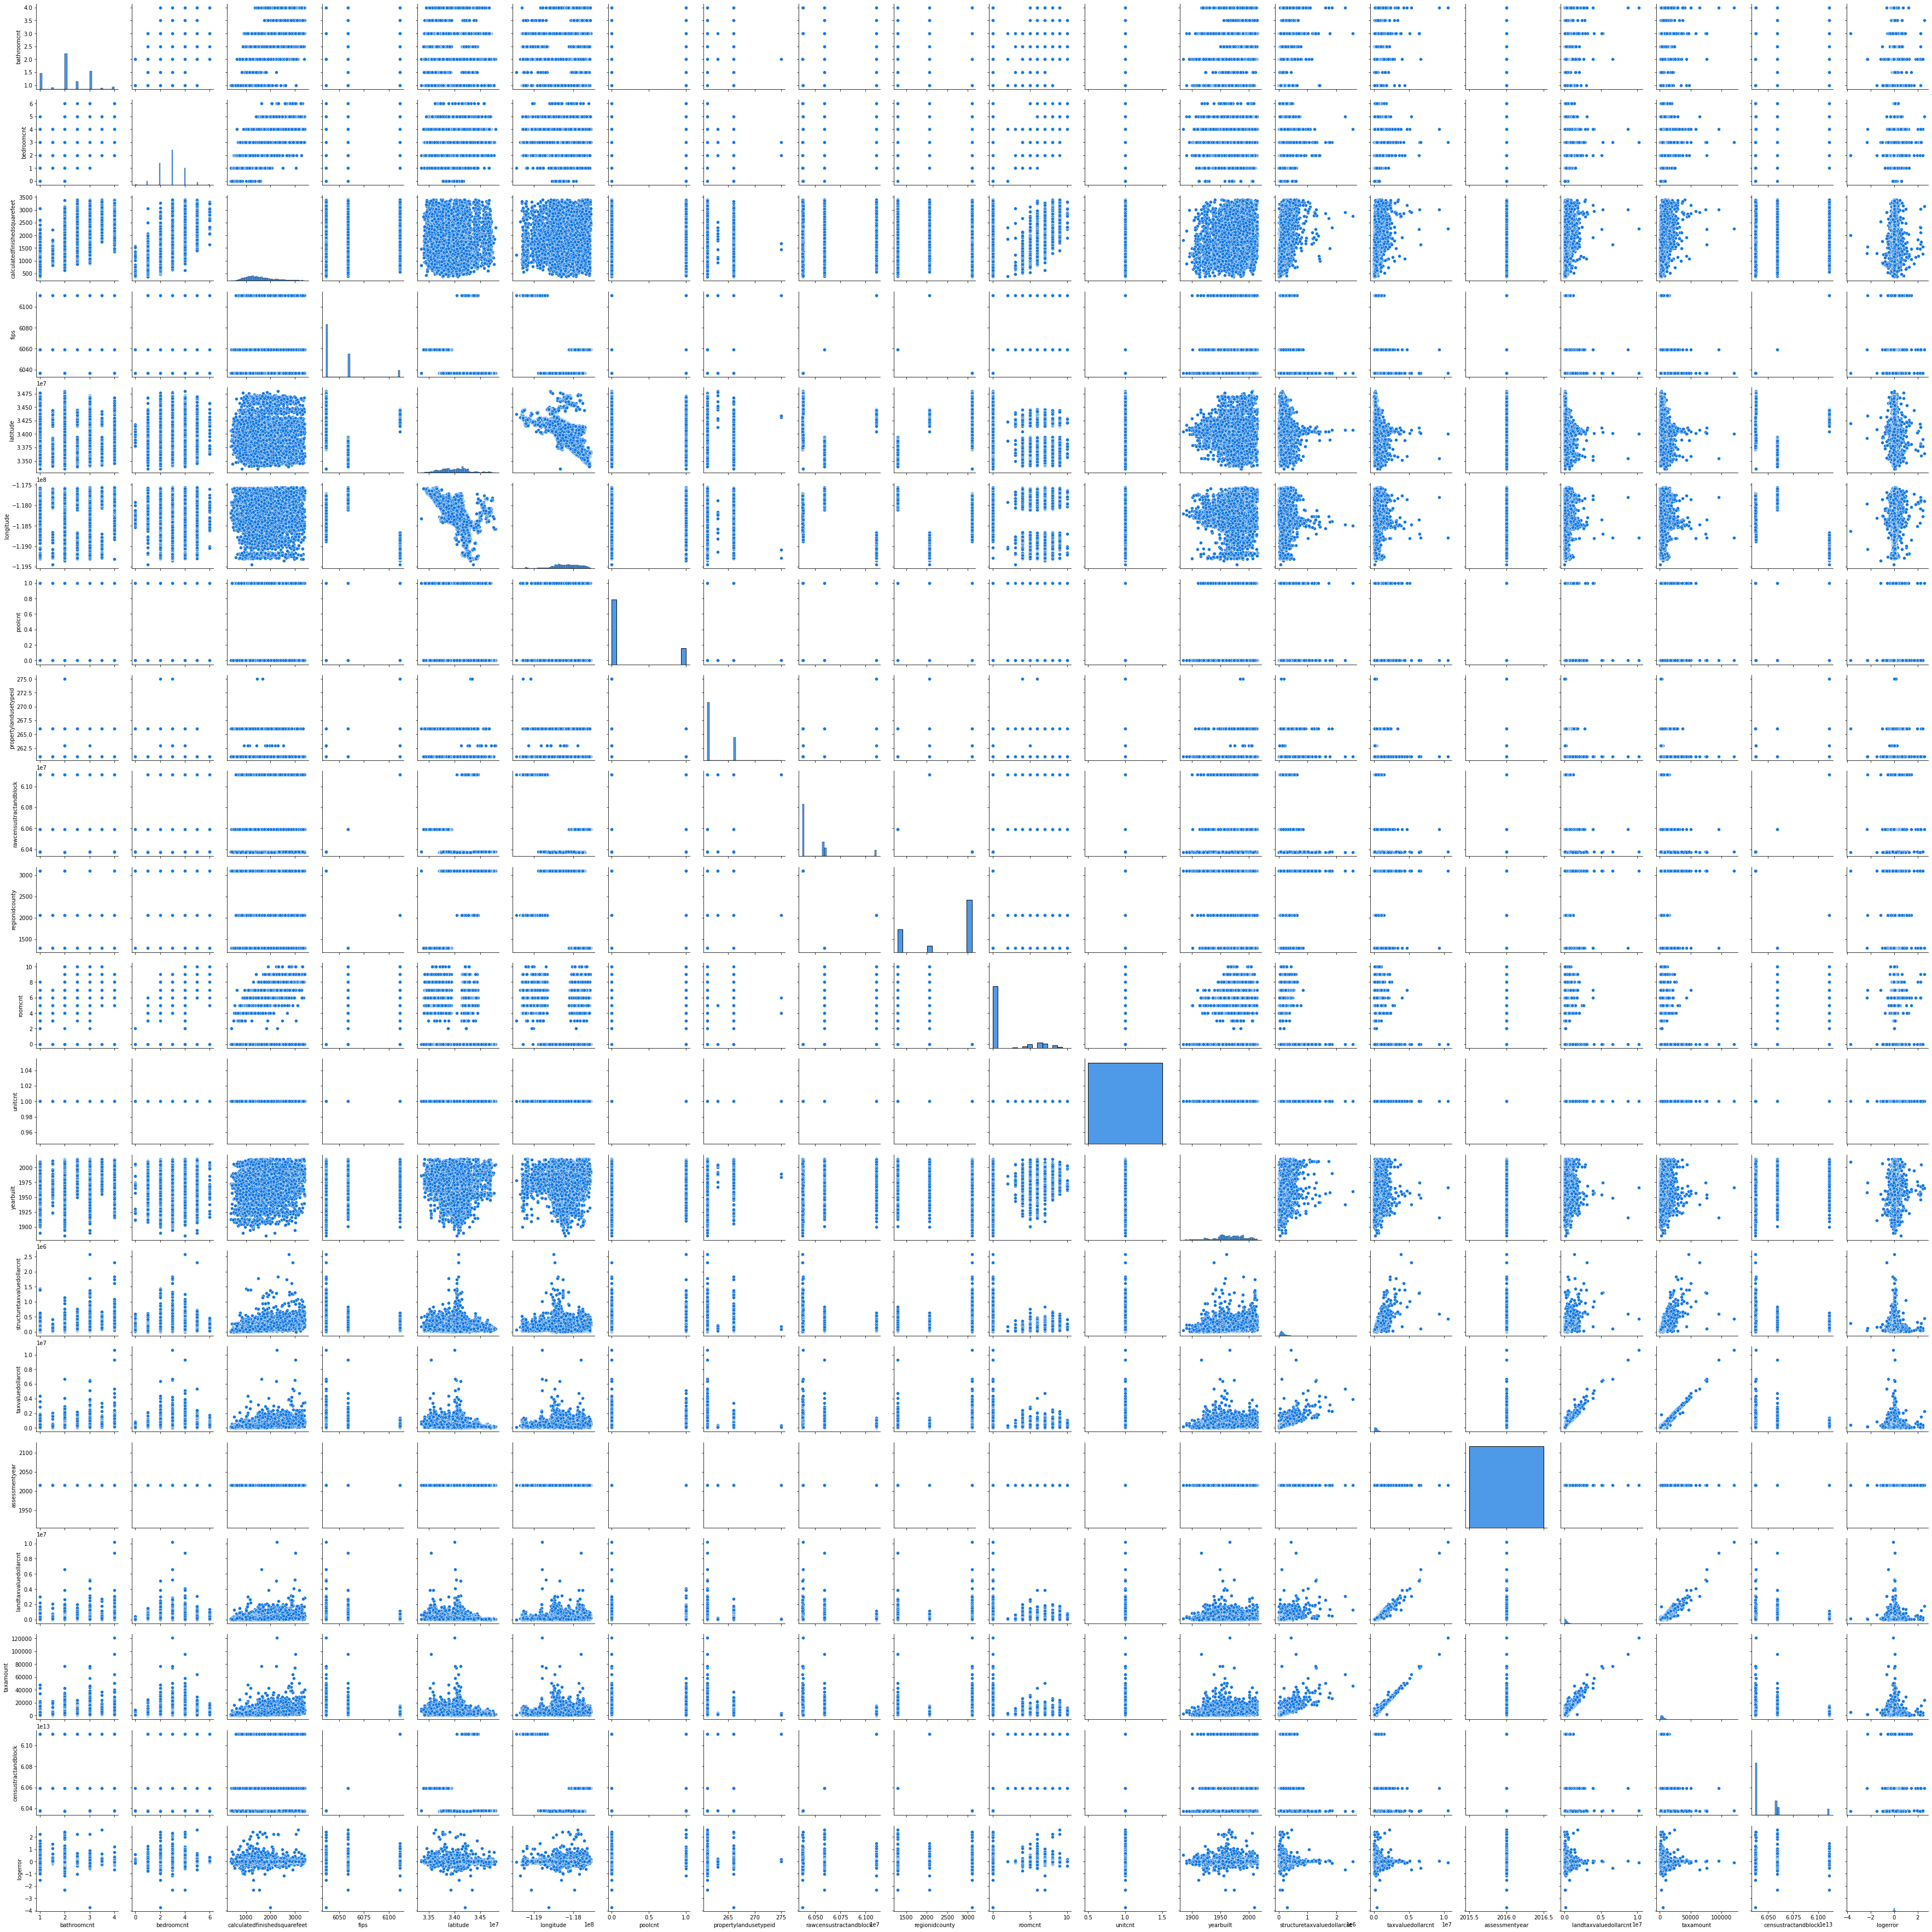

In [11]:
sns.pairplot(data = train.drop(columns=cols_to_drop).sample(10000))

### 2. Bivariate:
 - Does logerror score vary across county

In [58]:
# H0 variance in logerr in Orange County and Los Angeles are equivalent
# Alpha = 0.05

stats.levene(train[train.county == 'LA'].logerror, train[train.county=='Orange'].logerror)


LeveneResult(statistic=49.53973688951071, pvalue=1.980091240335876e-12)

- Reject the null hypothesis that Variance in Log error in Orange county and Los Angeles county are equivalent
- Takeaway: there is significance in the county where the house is located

In [13]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'poolcnt', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertylandusedesc',
       'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock', 'logerror', 'transactiondate', 'county'],
      dtype='object')

In [20]:
cols = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'poolcnt','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'county']

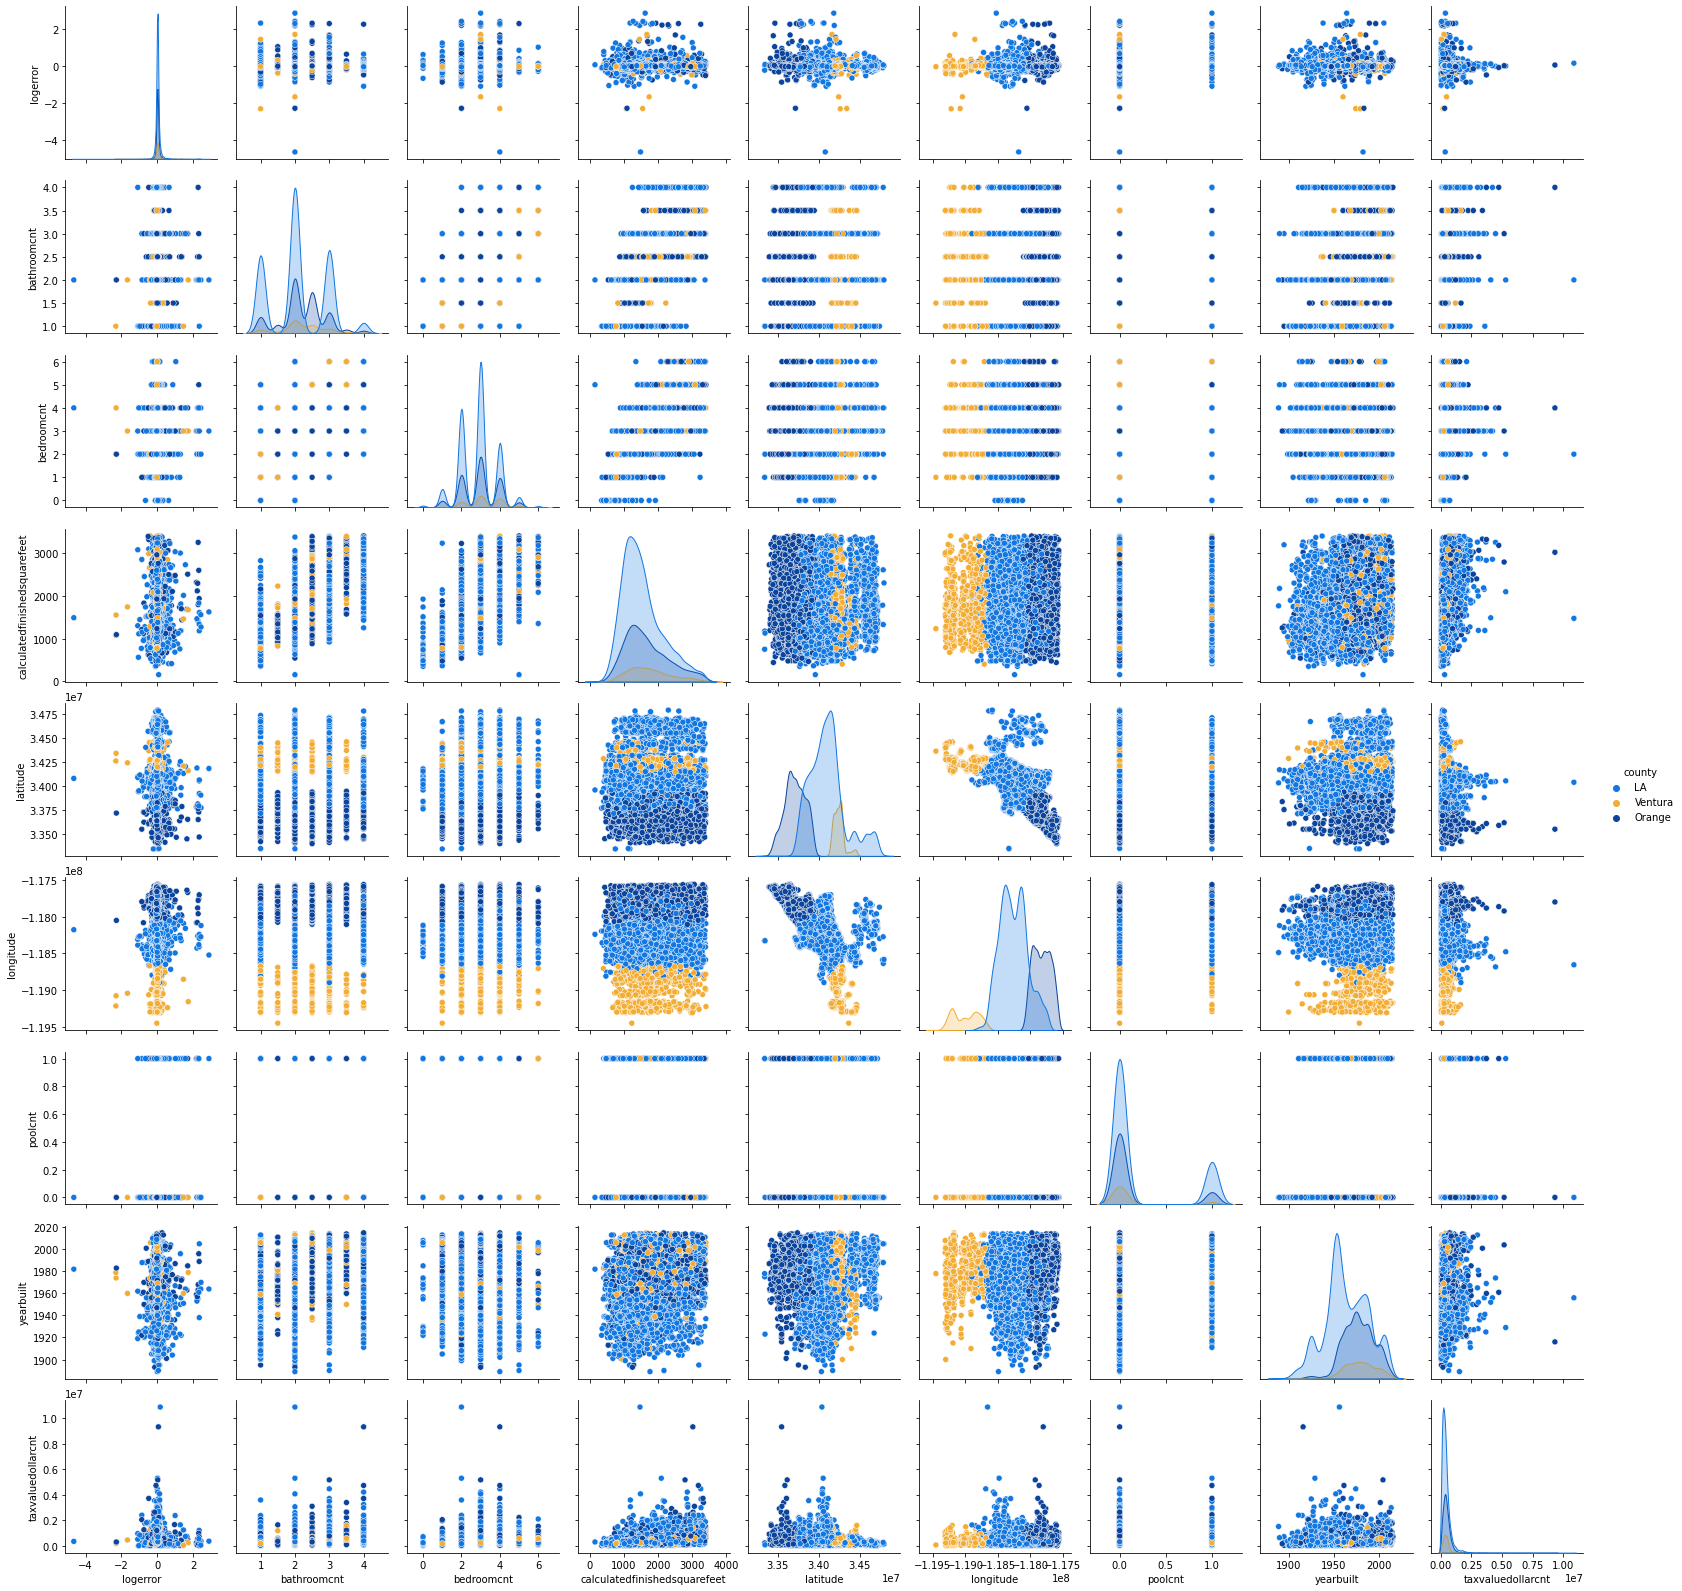

In [21]:
sns.pairplot(data = train[cols].sample(10000), hue = 'county')

In [23]:
train.taxvaluedollarcnt.describe()

count    3.757400e+04
mean     4.145388e+05
std      3.736411e+05
min      3.254000e+03
25%      1.950430e+05
50%      3.403130e+05
75%      5.229440e+05
max      1.087391e+07
Name: taxvaluedollarcnt, dtype: float64

In [26]:
train['value_bins'] = pd.cut(train.taxvaluedollarcnt, [3.254000e+03,1.950430e+05, 3.403130e+05, 5.229440e+05, 1.087391e+07])

In [27]:
cols = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 
        'longitude', 'poolcnt','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'county', 'value_bins']



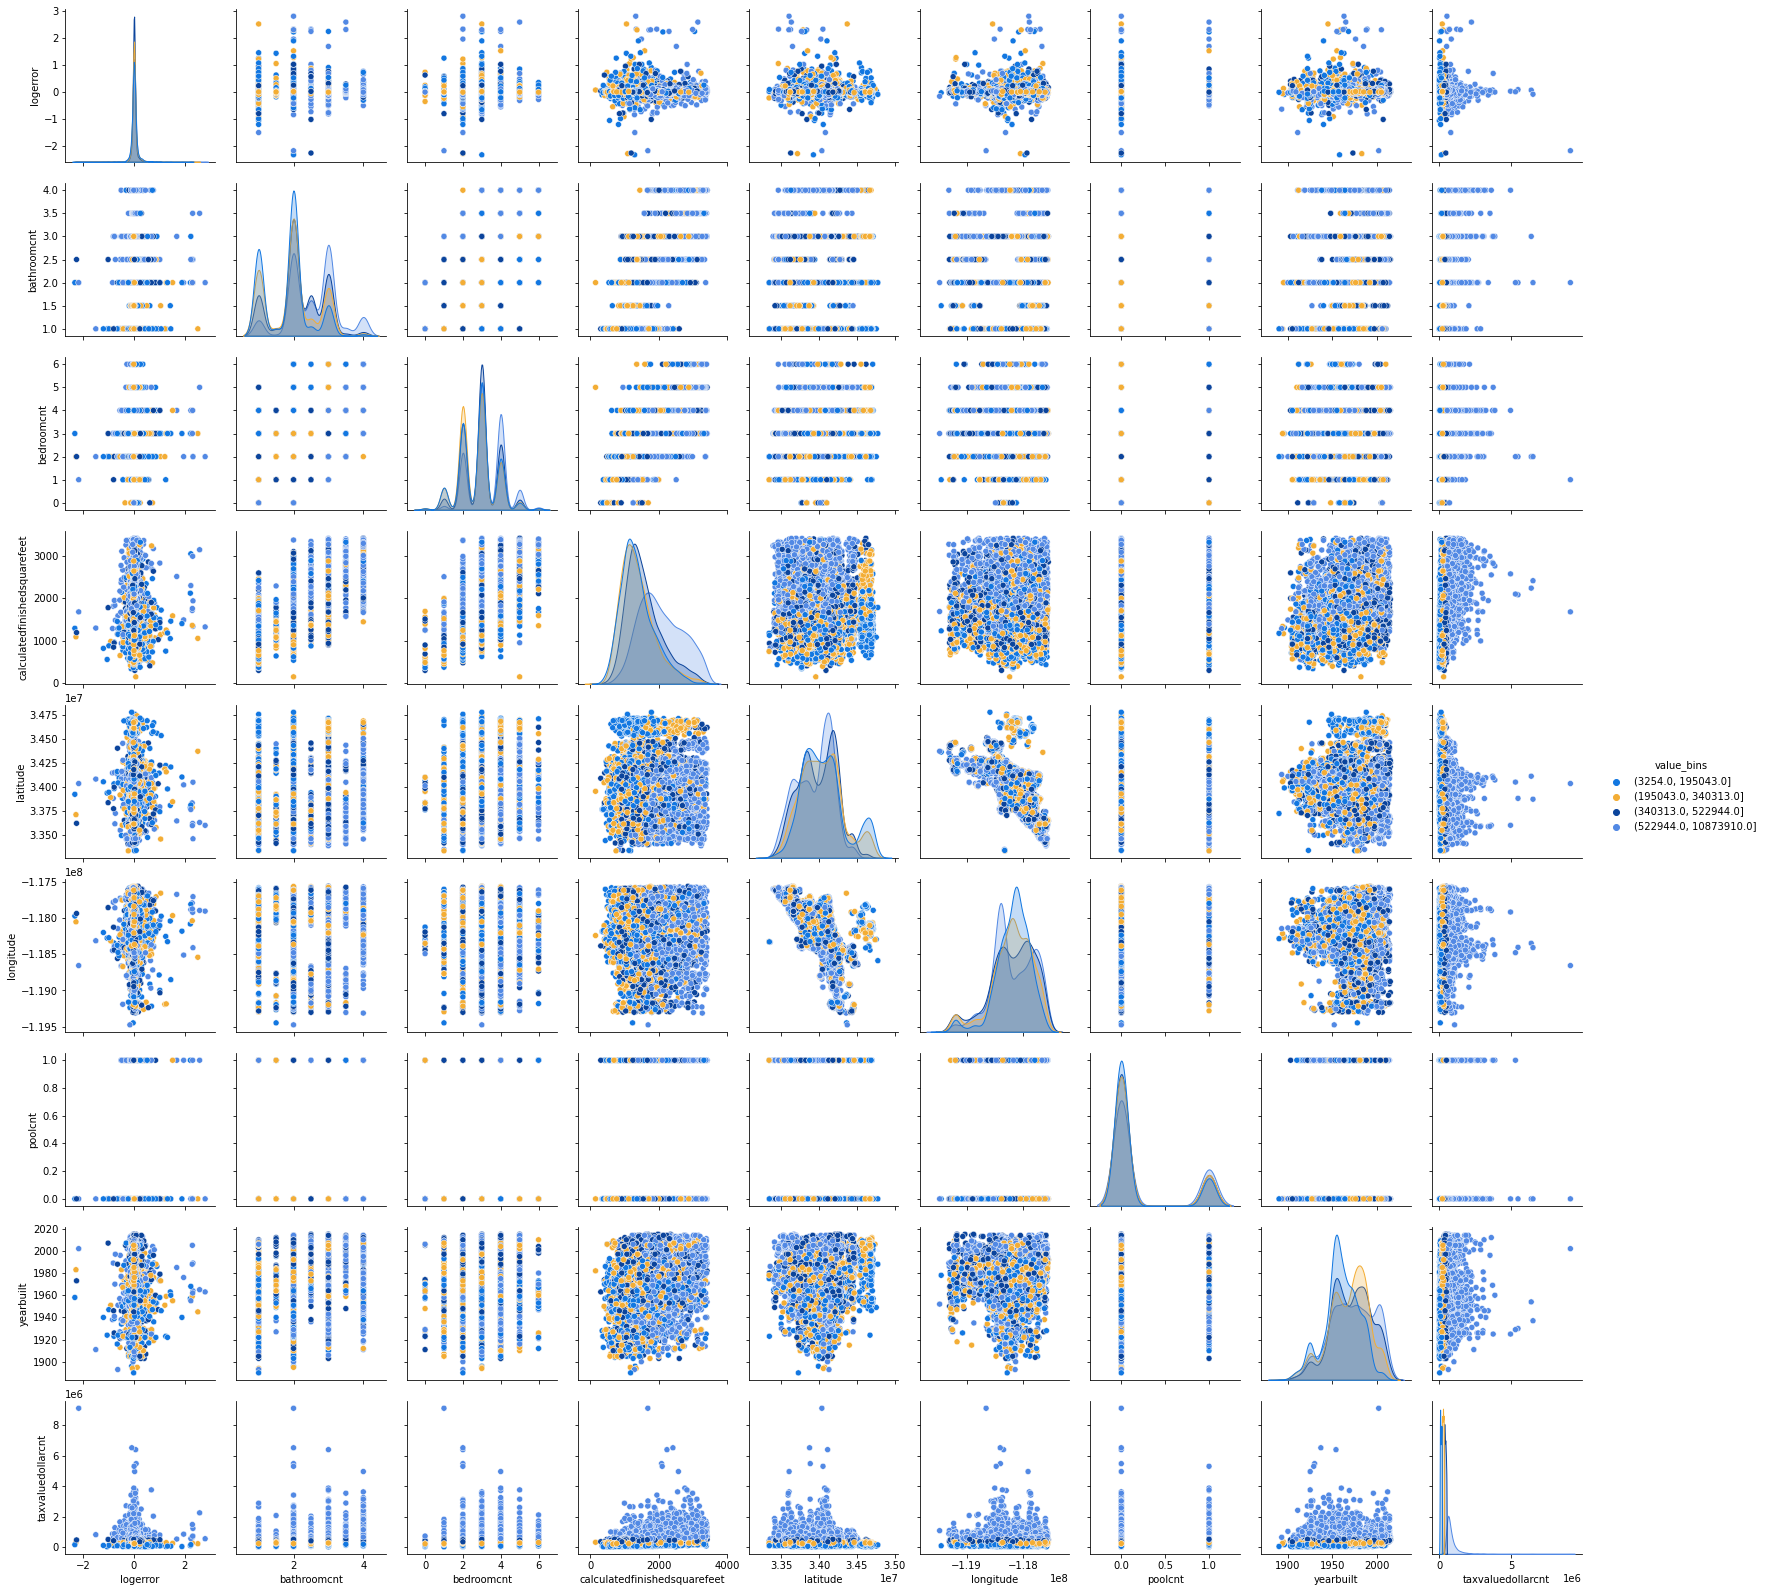

In [29]:
sns.pairplot(data = train[cols].sample(10000), hue = 'value_bins')

In [30]:
cols = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 
        'longitude','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'county', 'value_bins']

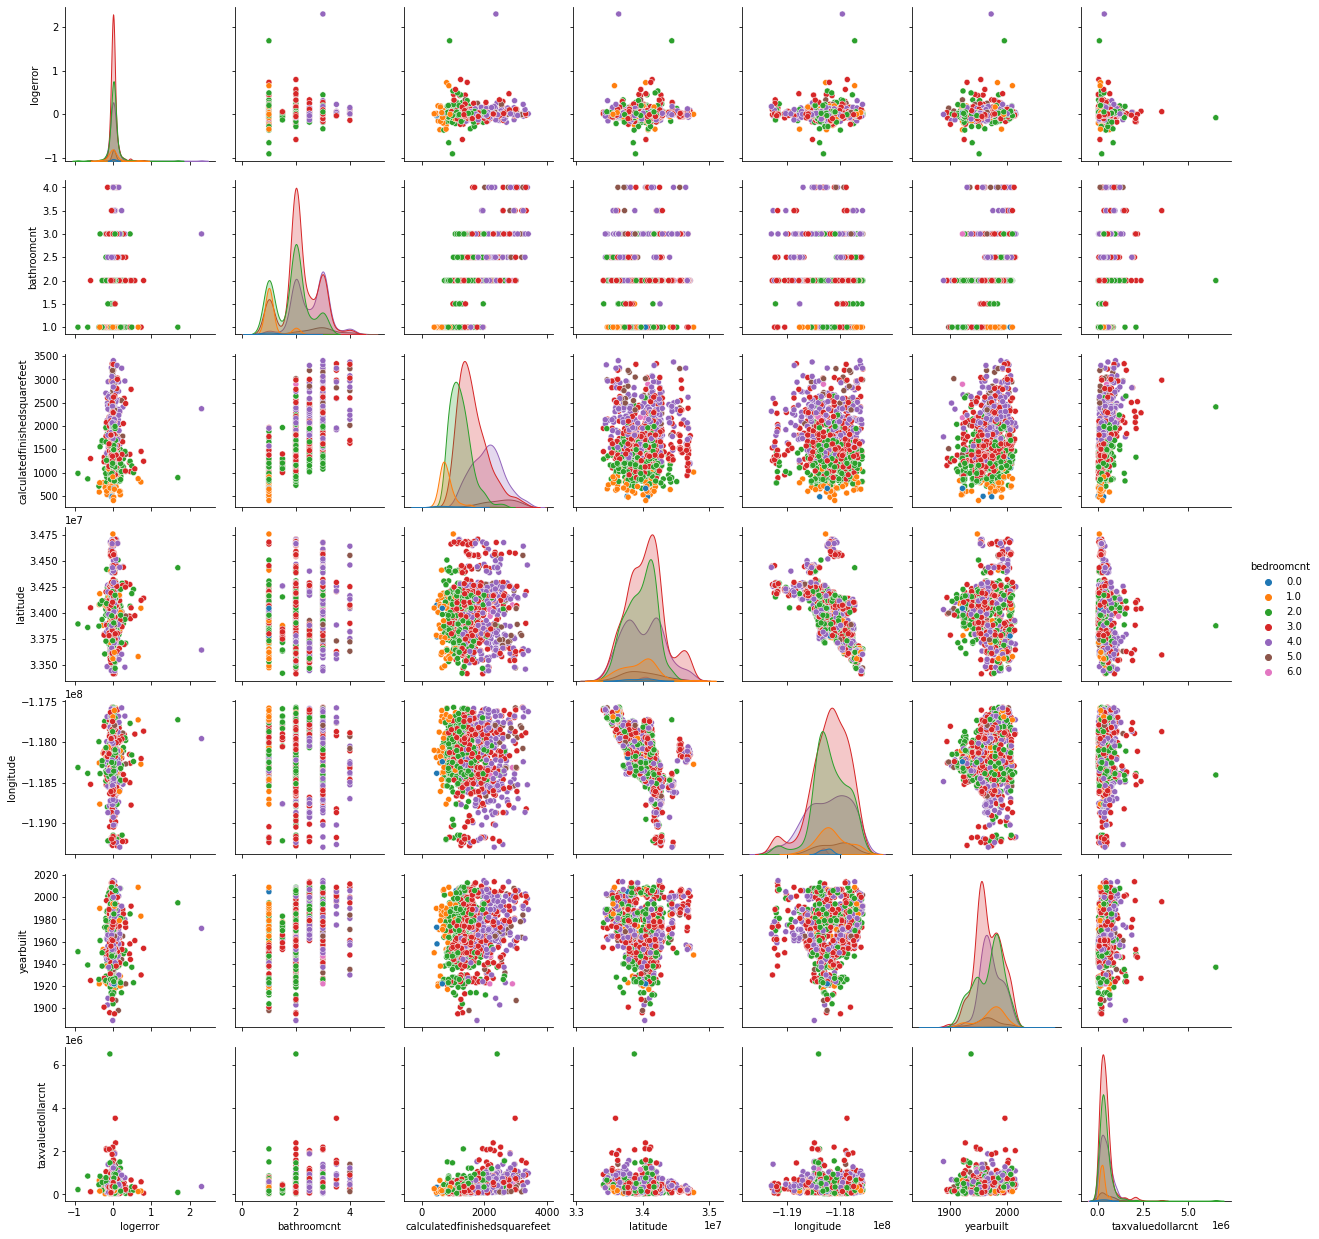

In [34]:
sns.pairplot(data = train[cols].sample(1000), hue = 'bedroomcnt', palette='tab10')

In [44]:
train.calculatedfinishedsquarefeet.describe()

count    37574.000000
mean      1592.309097
std        609.672952
min        152.000000
25%       1143.000000
50%       1468.000000
75%       1933.000000
max       3411.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [49]:
train['sqft_bins'] = pd.cut(train.calculatedfinishedsquarefeet, [15, 1143,1468, 1933, 3411])

In [50]:
cols = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 
        'longitude','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'county', 'sqft_bins']

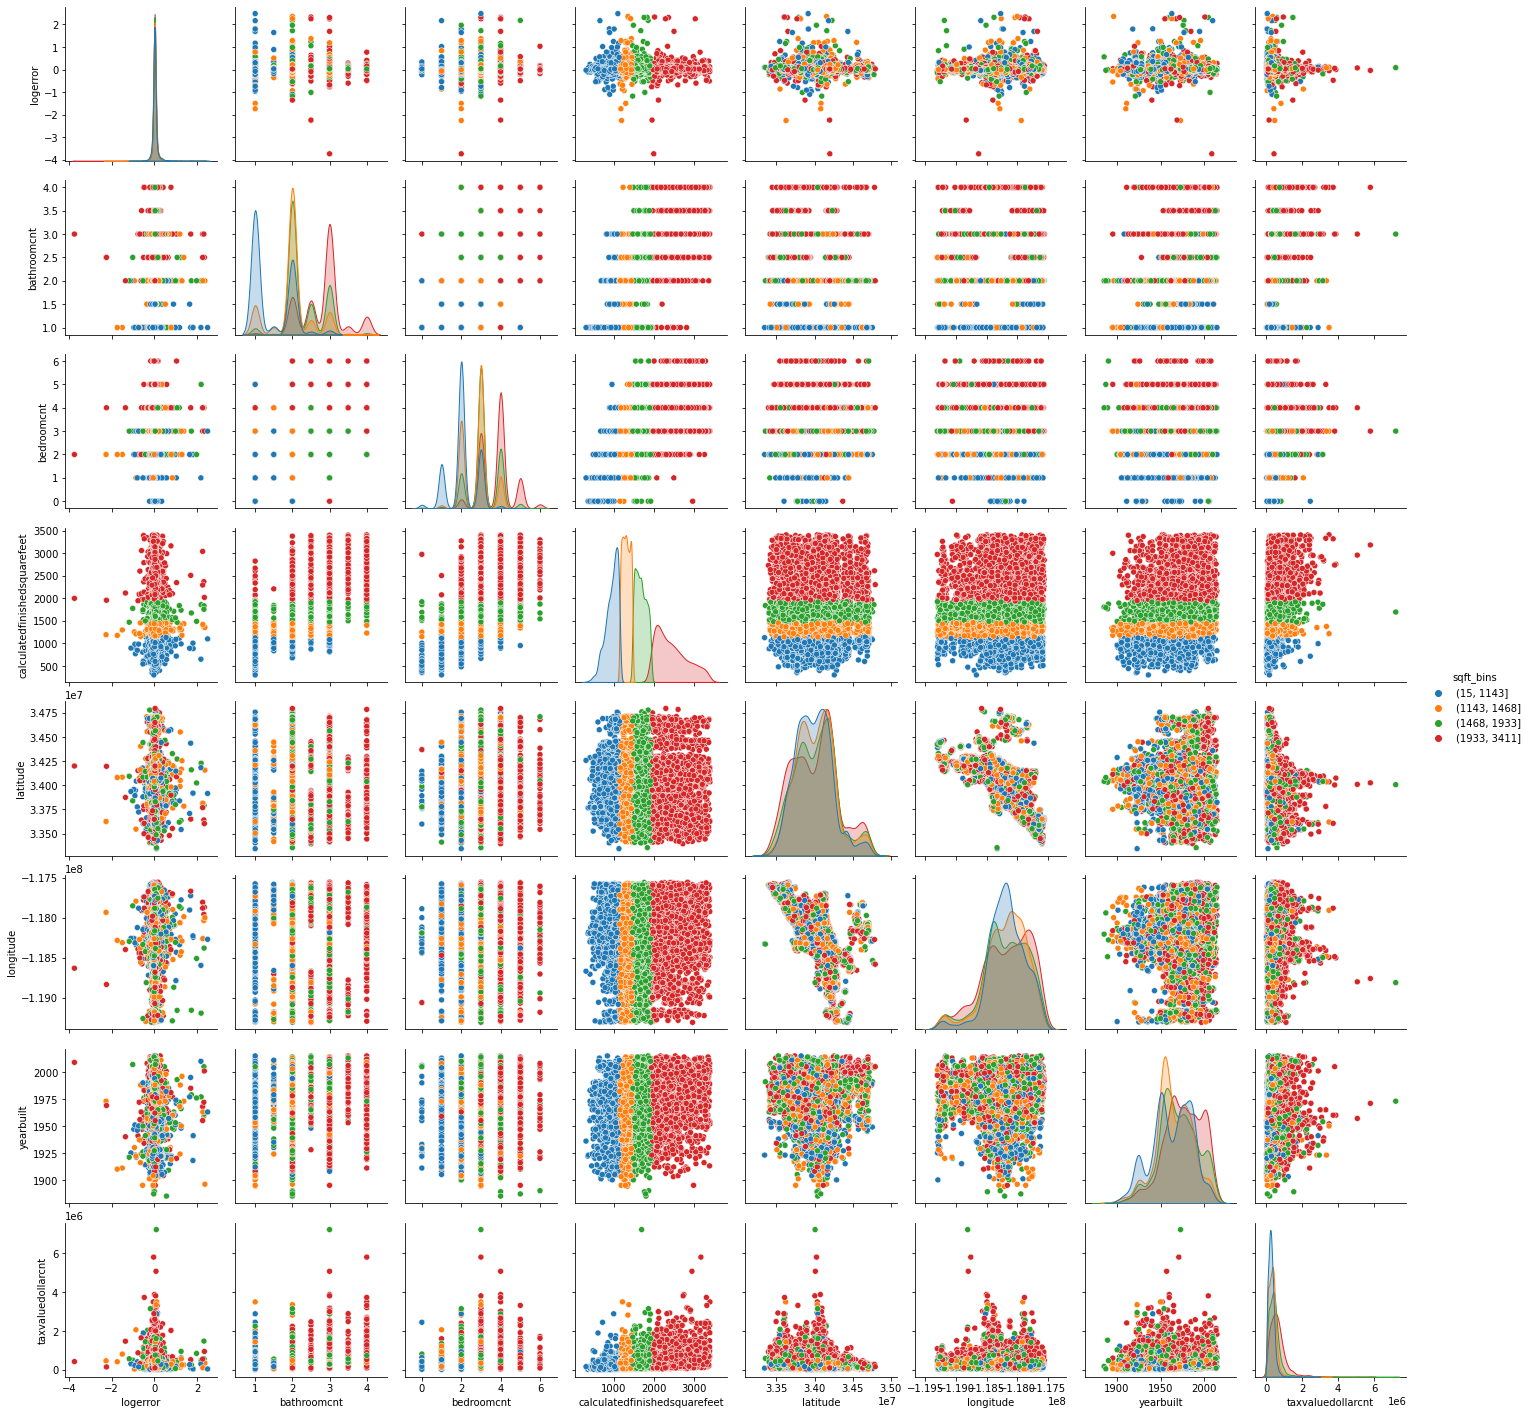

In [51]:
sns.pairplot(data = train[cols].sample(10000), hue = 'sqft_bins', palette = 'tab10')

### 3. Bivariate:
 - Is there a relationship between logerror and bedroom count?
 -----
 - Levene test compares means
 - T test? 
 - 

In [59]:
###
fips_with_sig_different_errors = []
zips = train.county.unique()

In [60]:
zips

array(['LA', 'Orange', 'Ventura'], dtype=object)

In [61]:
population_logerror_mean = train.logerror.mean()

In [62]:
# compares the different populations to the sample as a whole 

alpha = 0.05

for zipc in zips:
    t, p = stats.ttest_1samp(train[train.county == zipc].logerror, population_logerror_mean)
    if p < alpha:
        fips_with_sig_different_errors.append(zipc)

In [63]:
fips_with_sig_different_errors

['Orange']